<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/Potato_Disease_Classification_TFlite_model_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/PotatoDisease.zip','r') as zipObj:
     zipObj.extractall('PlantVillage')

In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/PlantVillage/PlantVillage'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 2152 files [00:00, 7643.29 files/s]


In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =20

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/PlantVillage/PlantVillage")

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 1506 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 215 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 431 images belonging to 3 classes.


In [ ]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)



9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [ ]:
history = model.fit(

    train_generator,
    steps_per_epoch= 47,
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =6,
    verbose=1,
    epochs =20
)

Epoch 1/20
47/47 [==============================] - 41s 631ms/step - loss: 0.3739 - accuracy: 0.8541 - val_loss: 0.1567 - val_accuracy: 0.9479
Epoch 2/20
47/47 [==============================] - 27s 576ms/step - loss: 0.1183 - accuracy: 0.9640 - val_loss: 0.1132 - val_accuracy: 0.9688
Epoch 3/20
47/47 [==============================] - 29s 615ms/step - loss: 0.0803 - accuracy: 0.9742 - val_loss: 0.0798 - val_accuracy: 0.9792
Epoch 4/20
47/47 [==============================] - 29s 617ms/step - loss: 0.0641 - accuracy: 0.9790 - val_loss: 0.0754 - val_accuracy: 0.9583
Epoch 5/20
47/47 [==============================] - 29s 618ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.1148 - val_accuracy: 0.9479
Epoch 6/20
47/47 [==============================] - 29s 613ms/step - loss: 0.0477 - accuracy: 0.9817 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 7/20
47/47 [==============================] - 28s 599ms/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0880 - val_accuracy: 0.9583

In [ ]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 7s 475ms/step - loss: 0.0506 - accuracy: 0.9814


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

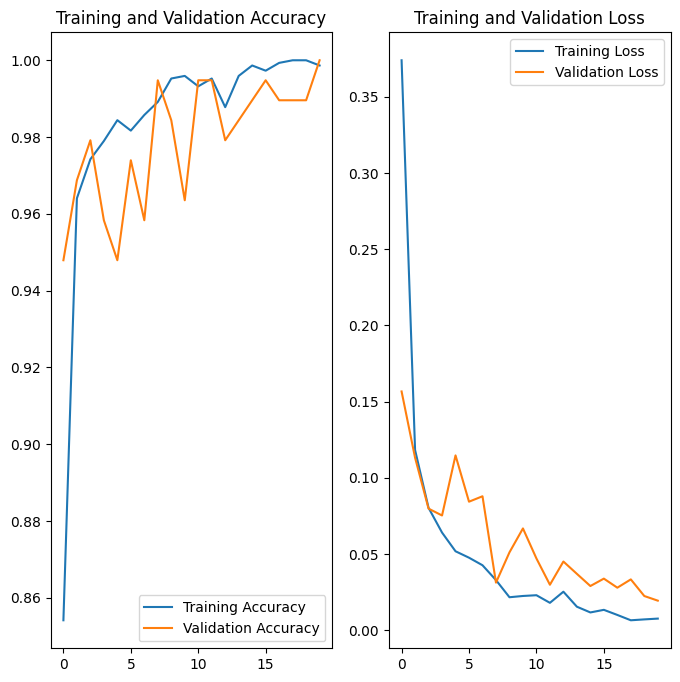

In [ ]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 1s 761ms/step
Predicted label:  Potato___Late_blight


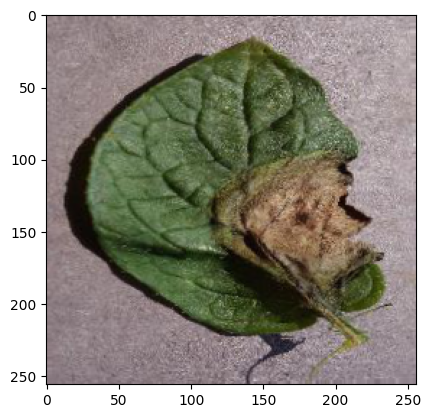

In [ ]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


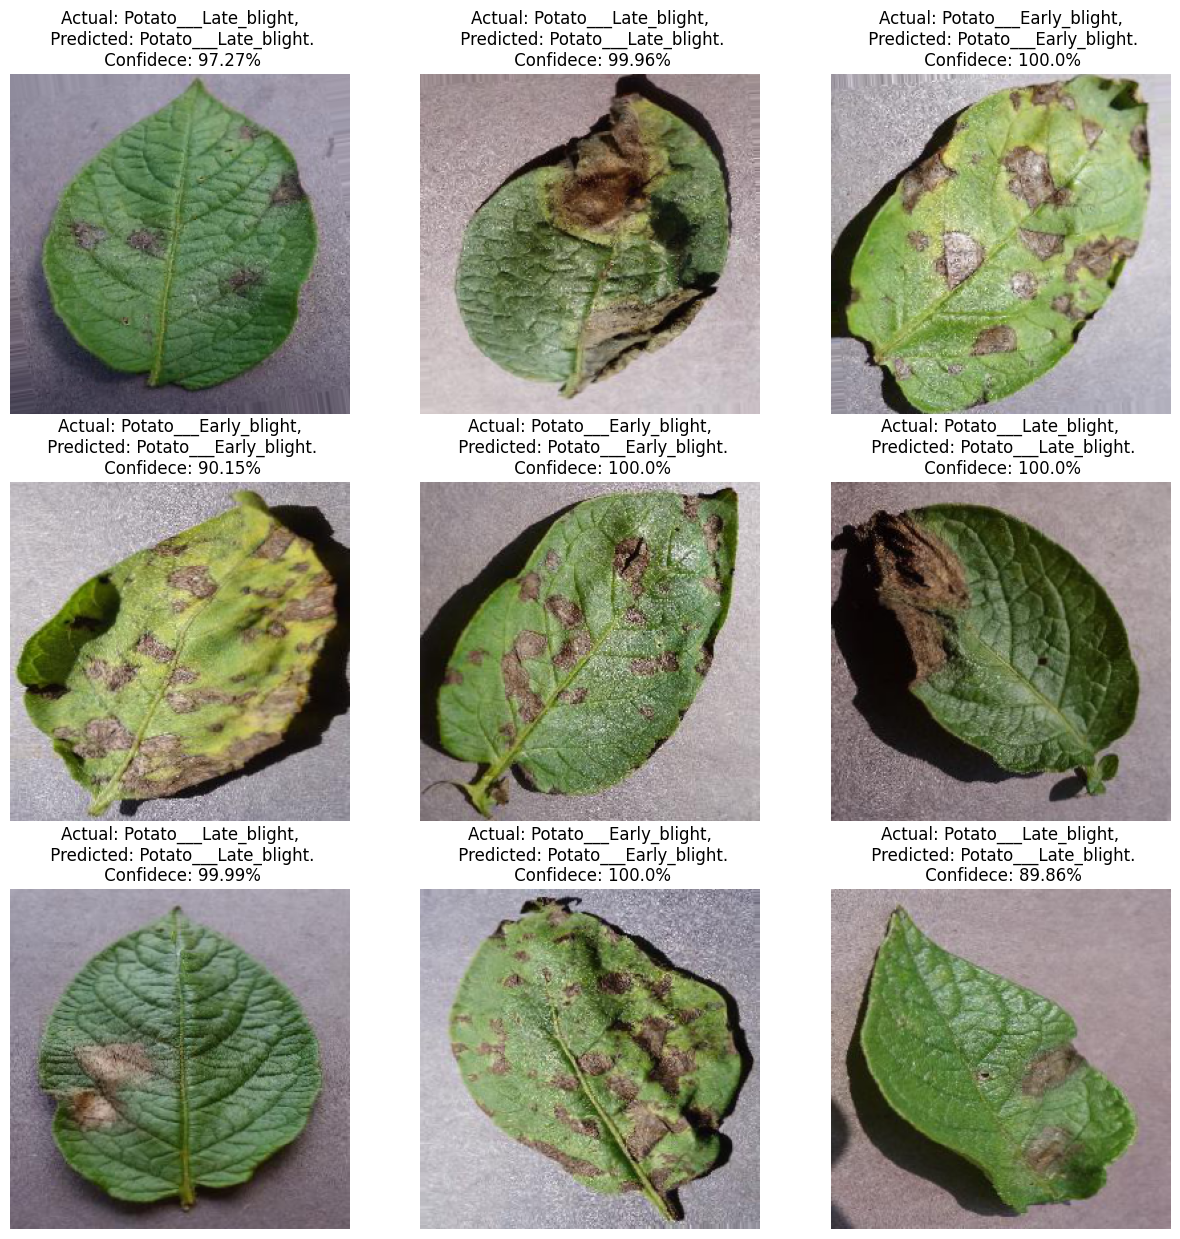

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [ ]:
model.save("/content/gdrive/MyDrive/Potato_disease_classification_models/trained_model_6(best)")

In [ ]:
model.save("/content/gdrive/MyDrive/Potato_disease_classification_models/trained_model_6.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
with open('/content/gdrive/MyDrive/Potato_disease_classification_models/tflite_quant_model_5.tflite', 'wb') as f:
   f.write(tflite_quant_model)